# PyXspec demo with NuSTAR and STIX data

Quick Links:

[Introduction](#intro)

[Installation and Setup](#installation)

[Getting Started](#startup)

[NuSTAR data demo](#nustar)

[STIX data demo](#stix)

<a id='intro'></a>
## Introduction - why Xspec?

Xspec is a free, flexible software used widely by the X-ray astrophysics community. 

Pros:
- free 
- regularly updated 
- huge model library
- extensive documentation, active Facebook group for user questions
- can fit more than one spectrum at a time (OSPEX can't)
- mulitple fitting approaches, can deal with low statistics (OSPEX only does chi-squared minimization)
- Python wrapper [PyXspec](https://heasarc.gsfc.nasa.gov/xanadu/xspec/python/html/index.html) included with installation
- You can write your own model functions in Python or C/C++/Fortran and use them [see sections "Local Models in C/C++/Fortran" and "Local Models in Python"](https://heasarc.gsfc.nasa.gov/xanadu/xspec/python/html/extended.html)

Cons:
- takes > 1 hour to build source code
- not many models relevant for solar spectra
- coronal solar abundances not built-in
- no GUI
- not very intuitive to learn
- in PyXspec, data and fit are stored in global objects that are only instantiated once ([see "The 6 Global Objects"](https://heasarc.gsfc.nasa.gov/xanadu/xspec/python/html/quick.html)), so you need to be careful about things getting overwritten

<a id='installation'></a>
## Installing Xspec/PyXspec:

- follow directions [here](https://heasarc.gsfc.nasa.gov/lheasoft/install.html) to install from source (necessary if including NuSTAR option, otherwise a precompiled distribution could possibly work)

- Buliding the code takes ~1.5 hours

## Accessing via STIX test server:

- Xspec and PyXspec can already be used from the command line or IPython/python prompts.

**important**

Before using Xspec, you MUST run these commands in a bash terminal:
```bash
export HEADAS=/home/stix_public/Documents/heasoft-6.29/x86_64-pc-linux-gnu-libc2.31
. $HEADAS/headas-init.sh
```

The HEADAS environment variable is the path to wherever this software is installed.


If using PyXspec, might also want to activate a scientific Python environment that includes SunPy, AstroPy, etc:
```bash
conda activate py37
```
Otherwise PyXspec is compatible with Python 2.6,2.7, and 3.x

### (optional) Run in Jupyter Notebook via the STIX test server, but view and edit from the comfort of your own favorite browser

1. Connect to FHNW VPN
2. Log into stix_public. (Don't change from the default shell - ie, do nothing)
3. Activate the correct environment via:
```bash
conda activate py37
```
This ensures that the correct version of python and all the neccesary packages for running pyxspec are present. 
4. Run the two commands
```bash
export HEADAS=/home/stix_public/Documents/heasoft-6.29/x86_64-pc-linux-gnu-libc2.31
. $HEADAS/headas-init.sh
```
5. Start a notebook server in the desired folder via the command:
```bash
 jupyter notebook --no-browser --port=8889
```
if port 8889 is not free, try any port 888X

6. On your local machine, enter this command:
```bash
ssh -N -f -L localhost:8889:localhost:8889 stix_public@v000672.fhnw.ch
```
If you have your own account, you can use your username instead of _stix_public_.
Again, if your port 8889 is in use, change the number of the first localhost argument to some other number.
7. Enter the localhost address into a browser; in this example, copy-paste localhost:8889 into Firefox, Chrome, etc. You should now see the Jupyter tree of the folder in stix_public displayed in your browser.

![screenshot of jupyter tree](https://github.com/elastufka/SAX-XRS_figures/blob/779f8a2d243cfe2f4f1327961dd4a26afc70153d/jupyter_server.png?raw=true)

<a id='setup'></a>
# Let's get started!

In [13]:
import xspec #run this to make sure everything is working correctly

In [14]:
#other packages 
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.time import Time
from datetime import datetime as dt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

It's best not to clog _stix_public_ with all your data files. If you have an account on the server, just access your own account's files by changing to the appropriate directory

In [15]:
cd /home/erica/Xspec_demo

/home/erica/Xspec_demo


These are the NuSTAR data for this demo.

In [16]:
ls nu*

nu80610208001A06_chu12_N_sr.arf  nu80610208001B06_chu12_N_sr.arf
nu80610208001A06_chu12_N_sr.pha  nu80610208001B06_chu12_N_sr.pha
nu80610208001A06_chu12_N_sr.rmf  nu80610208001B06_chu12_N_sr.rmf


These are the STIX data for this demo. The procedure to convert STIX spectrograms from their usual format to one that is useable with Xspec is still under develompent by Ewan and Mithun.

In [17]:
ls *.fits

stx_spectrum_20210908_1712.fits  stx_srm_20210908_1712.fits


## (optional ) logging

Pros: important since so much information is printed to the terminal!

Cons: probably don't have permission to do this in stix_public

In [18]:
#logfile = xspec.Xset.openLog("xspec.log")

<a id='nustar'></a>
# NuSTAR data demo

NuSTAR has two telescopes with slightly different responses. With Xspec, the counts from each of them can be combined for a spectral fit.

In [98]:
xspec.AllData.clear() #if you did the STIX demo first, run this to remove all spectra from the data container

In [99]:
phaA='nu80610208001A06_chu12_N_sr.pha' #count array from FPMA
phaB='nu80610208001B06_chu12_N_sr.pha' #count array from FPMB
xspec.AllData(f"1:1 {phaA} 2:2 {phaB}")


2 spectra  in use
 
Spectral Data File: nu80610208001A06_chu12_N_sr.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.418e+00 +/- 1.026e-01
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-4096
  Telescope: NuSTAR Instrument: FPMA  Channel Type: PI
  Exposure Time: 134.7 sec
 Using fit statistic: chi
 Using Response (RMF) File            nu80610208001A06_chu12_N_sr.rmf for Source 1
 Using Auxiliary Response (ARF) File  nu80610208001A06_chu12_N_sr.arf

Spectral Data File: nu80610208001B06_chu12_N_sr.pha  Spectrum 2
Net count rate (cts/s) for Spectrum:2  1.832e+00 +/- 1.175e-01
 Assigned to Data Group 2 and Plot Group 2
  Noticed Channels:  1-4096
  Telescope: NuSTAR Instrument: FPMB  Channel Type: PI
  Exposure Time: 132.7 sec
 Using fit statistic: chi
 Using Response (RMF) File            nu80610208001B06_chu12_N_sr.rmf for Source 1
 Using Auxiliary Response (ARF) File  nu80610208001B06_chu12_N_sr.arf


Fit statistic  : Chi-Squared              2.967894e+18    

This command assigns _phaA_ to Spectrum 1 and PlotGroup 1, and _phaB_ to Spectrum 2 and PlotGroup 2. If response (.rmf) files and auxilary response (.arf) files are specified in the header keywords of the input files, these will be read as well, assuming they live in the same directory.

Right now, all channels are in use ('Noticed Channels'). For fitting, it will make sense to only 'notice' certain relevant channels.

_Note: if running with your own Xspec installation, chances are the output will be printed to the terminal in which your notebook server is running, or to the log file if you've enabled logging._

### Plot configuration

[more plotting options](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node112.html)

In [100]:
xspec.Plot.add=False #plot spectra seperately for now
xspec.Plot.device = '/null' #don't use the default plot device (X)
xspec.Plot.xAxis = "keV" #use energy instead of index

In [101]:
xspec.Plot.setGroup("1 2") #spectrum 1 in plot group 1, spectrum 2 in plot group 2
xspec.Plot('ldata') #log10(data) . Using 'data' will also work just fine
x1=xspec.Plot.x()
y1=xspec.Plot.y()
y1err=xspec.Plot.yErr()
x2=xspec.Plot.x(2)
y2=xspec.Plot.y(2)
y2err=xspec.Plot.yErr(2)

***Warning: Fit is not current.


To look at the data together:

In [108]:
xspec.Plot.add=True
xspec.Plot.setGroup("1-2") #spectrum 1 and 2 in plot group 1. Now the data in xspec.Plot.y(), etc. has changed!
xspec.Plot('ldata')
x3=xspec.Plot.x()
y3=xspec.Plot.y()
y3err=xspec.Plot.yErr()

***Warning: Fit is not current.


***Warning!!***

If you have previously used Xspec for any other data set such as the STIX demo, that data will still be around in the Plot manager! Should everything be done correctly, this will not affect the fit, but running the following cell won't cause an error, meaning that the plot data for those spectra are still available. To be on the very safe side, re-start this notebook kernel and re-import xspec to initiate empty global objects.

In [24]:
#xspec.Plot.y(4) #if this doesn't cause an error, you might have old data hanging around in the PlotManager!

In [110]:
fig=make_subplots(rows=1,cols=3, shared_xaxes=True,shared_yaxes=True,subplot_titles=['FPMA','FPMB','FPMA+FPMB'])
fig.add_trace(go.Scatter(x=x1,y=y1,mode='markers',error_y=dict(type='data',array=y1err),name='FPMA'),row=1,col=1)
fig.add_trace(go.Scatter(x=x2,y=y2,mode='markers',error_y=dict(type='data',array=y2err),name='FPMB'),row=1,col=2)
fig.add_trace(go.Scatter(x=x3,y=y3,mode='markers',error_y=dict(type='data',array=y3err),name='FPMA+FPMB'),row=1,col=3)
fig.update_layout(title='NuSTAR spectra',xaxis_title='Energy (keV)')
for c in range(1,4):
    fig.update_yaxes(title='Counts s<sup>-1</sup> keV<sup>-1</sup>',range=[-1.5,.7],row=1,col=c,type='log') #type='log'
    fig.update_xaxes(title='Energy (keV)',range=[1,6],row=1,col=c) 
fig.show()

## Model Configuration

All available models are documented here https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/Models.html

For this demo, we use _const+apec_, a constant model plus a emission spectrum from collisionally-ionized diffuse gas. [More details here](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node133.html)

In [26]:
xspec.Xset.abund="file feld92a_coronal0.txt" #load coronal abundaces

 Solar Abundance Vector set to file:  User defined abundance vector / no description specified


In [27]:
#set up the model
xspec.Fit.statMethod='cstat' #use Cash statistics for low counts
m1=xspec.Model("const*apec") #const*apec

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Model constant<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
                           Data group: 1
   1    1   constant   factor              1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
                           Data group: 2
   6    1   constant   factor              1.00000      = p1
   7    2   apec       kT         keV      1.00000      = p2
   8    2   apec       Abundanc            1.00000      = p3
   9    2   apec       Redshift            0.0          = p4
  10    2   apec       norm                1.00000      = p5
____________________________________________

In [28]:
#m1.show() #this shows the model parameters, their names, default and/or fit values, etc, in the terminal or logfile in case they don't show up in the notebook

Set the constant parameter of the first model (telescope A) to a default value of 1 and allow steps in increments of 0.1.

In [29]:
m1.setPars({1:"1.0 -.1"})


Fit statistic  : C-Statistic                 1186.10     using 4096 bins.
                 C-Statistic                 1244.63     using 4096 bins.
Total fit statistic                          2430.72     with 8190 d.o.f.

Test statistic : Chi-Squared                  821.04     using 8192 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 2 

 Null hypothesis probability of 1.00e+00 with 8190 degrees of freedom
 Current data and model not fit yet.


Because we are using two spectra from two telescopes, we want to allow the constant of FPMA and FPMB to be different from each other. By default, the two constant\*apec models are tied to each other, so we must untie the constant of FPMB from the joint model and allow it to vary (unfreeze it).

In [30]:
m2=xspec.AllModels(2) #select the second model, for FPMB
p6=getattr(m2.constant,'factor') #select the constant parameter of the const*apec model
p6.untie() #untie parameter from model
p6.frozen=False #allow parameter to vary


Fit statistic  : C-Statistic                 1186.10     using 4096 bins.
                 C-Statistic                 1244.63     using 4096 bins.
Total fit statistic                          2430.72     with 8190 d.o.f.

Test statistic : Chi-Squared                  821.04     using 8192 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 2 

 Null hypothesis probability of 1.00e+00 with 8190 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                 1186.10     using 4096 bins.
                 C-Statistic                 1244.63     using 4096 bins.
Total fit statistic                          2430.72     with 8189 d.o.f.

Test statistic : Chi-Squared                  821.04     using 8192 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 2 

 Null hypothesis probability of 1.00e+00 with 8189 degrees of freedom
 

In [31]:
#choose an appropriate fit range
fitstart=2.5 #make sure to use floats, otherwise units will be Xspec channels (indices)
fitend=4.5
xspec.AllData.ignore(f"0.-{fitstart} {fitend}-**") #ignore everything outside selected filters. Snytax is the same as in Xspec

    23 channels (1-23) ignored in spectrum #     1
    23 channels (1-23) ignored in spectrum #     2
  4024 channels (73-4096) ignored in spectrum #     1
  4024 channels (73-4096) ignored in spectrum #     2

Fit statistic  : C-Statistic                  199.02     using 49 bins.
                 C-Statistic                  160.72     using 49 bins.
Total fit statistic                           359.75     with 95 d.o.f.

Test statistic : Chi-Squared                  520.49     using 98 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 2 

 Null hypothesis probability of 6.34e-60 with 95 degrees of freedom
 Current data and model not fit yet.



### Do the fit

In [32]:
xspec.Fit.query = "no"
xspec.Fit.renorm() #parameter normalization, you will see a reduction in test statistics after running this
xspec.Fit.nIterations=1000
xspec.Fit.perform()


Fit statistic  : C-Statistic                   66.38     using 49 bins.
                 C-Statistic                   74.31     using 49 bins.
Total fit statistic                           140.69     with 95 d.o.f.

Test statistic : Chi-Squared                   52.91     using 98 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 2 

 Null hypothesis probability of 1.00e+00 with 95 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          2:kT        5:norm      6:factor
134.155      9.97498       0      0.898243      0.262982       1.14621
130.416      11.9038       0      0.858716      0.284273       1.27913
127.474      10.2844       0      0.824009      0.307520       1.39142
124.848      9.72226       0      0.791340      0.333997       1.48661
122.552      8.79422       0      0.766280      0.362259       1.56046
120.626      8.16675

### Calculate errors

Get the 1.0-sigma error for model parameters 2,5, and 6 (kT, norm, and telescope 2 constant). Here the parameter named norm reperesents the emission measure.

Because all the parameters except the constant for telescope 2 are tied together, parameters 7 and 10 (model 2 kT and norm) will have the same values as parameters 2 and 5.

In [33]:
xspec.Fit.error("1.0 2 5 6")

 Parameter   Confidence Range (1)
     2     0.210644     0.267179    (-0.0256874,0.0308474)
 Due to zero model norms, the following fit parameters are temporarily frozen:2 6 

 Fit error occurred during lower bound error calculation.
     5            0      1543.64    (-444.538,1099.1)
     6      1.19077      1.94227    (-0.328009,0.423488)



***XSPEC Error:  No variable parameters for fit 

### Get fit statistics

(you can also check the output to the terminal or notebook for these)

In [34]:
xspec.Fit.statistic #c-statistic

53.808221845357366

In [35]:
xspec.Fit.testStatistic #chi-squared

34.09523579247373

## Format fit data for export and/or plotting

In [36]:
#optional but simplifies things, and gives an example of how to get parameters from model
kev2mk=0.0861733
emfact=3.5557e-42
c2=m1.apec #telescope 1 constant*apec model
T=c2.kT.values[0]/kev2mk #fit temperature
T_lbound=c2.kT.error[0]/kev2mk #fit temperature lower bound
T_ubound=c2.kT.error[1]/kev2mk #fit temperature upper bound
EM=c2.norm.values[0]/emfact #fit emission measure
EM_lbound=c2.norm.error[0]/emfact #fit emission measure lower bound
EM_ubound=c2.norm.error[1]/emfact #fit emission measure upper bound
m2=xspec.AllModels(2).constant #telescope 2 constant model
FPMB_fac=m2.factor.values[0] #telescope 2 fit constant
FPMB_lbound=m2.factor.error[0] #telescope 2 fit constant lower bound
FPMB_ubound=m2.factor.error[0] #telescope 2 fit constant upper bound

In [37]:
#plot setup
xspec.AllData.notice("2.0-5.0") #look at a slightly larger range than what was fit
xspec.Plot.setGroup("1-2") 
xspec.Plot.add=True
xspec.Plot.iplot('ldata') #now new data is stored in xspec.Plot

    76 channels (10-85) noticed in spectrum #     1
    76 channels (10-85) noticed in spectrum #     2

Fit statistic  : C-Statistic                   43.11     using 76 bins.
                 C-Statistic                   41.93     using 76 bins.
Total fit statistic                            85.04     with 149 d.o.f.

Test statistic : Chi-Squared                   68.93     using 152 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 2 

 Null hypothesis probability of 1.00e+00 with 149 degrees of freedom
 Current data and model not fit yet.

***Warning: Fit is not current.
PLT> 

In [38]:
energy=xspec.Plot.x()
dE=xspec.Plot.xErr()
data=xspec.Plot.y()
data_err=xspec.Plot.yErr()
xspec_fit=xspec.Plot.model() 

In [39]:
#optional - put results in dataframe for use or export
df=pd.DataFrame(dict(energy=energy,dE=dE,data=data,data_err=data_err,xspec_fit=xspec_fit))
df.head()

energy    dE      data  data_err  xspec_fit
0    1.98  0.02  1.403257  0.362330   1.178307
1    2.02  0.02  2.242617  0.457786   1.415060
2    2.06  0.02  1.967155  0.429280   1.581419
3    2.10  0.02  1.217694  0.337737   1.666557
4    2.14  0.02  1.406132  0.363071   1.682371

In [40]:
#df_ld.to_csv('xspec_demo_fit.csv')

## Plot results

In [41]:
title=f"{T:.2f} ({T_lbound:.2f}-{T_ubound:.2f}) MK \n {EM:.2e} ({EM_lbound:.2e}-{EM_ubound:.2e}) cm<sup>-3</sup>"

In [42]:
%matplotlib notebook

<IPython.core.display.Javascript object>


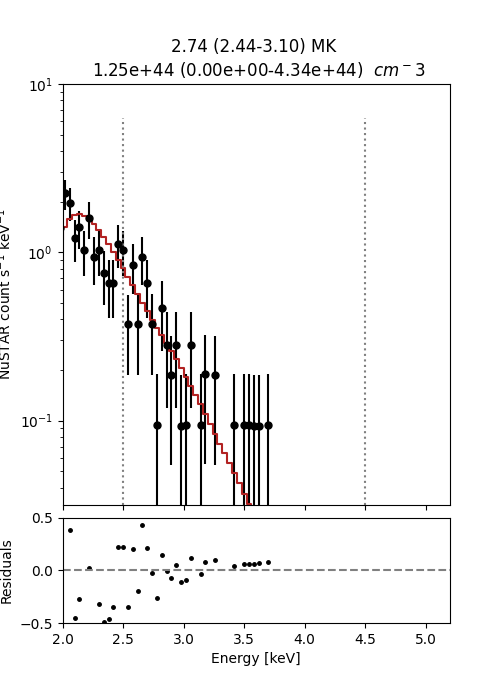

Text(0, 0.5, 'Residuals')

In [43]:
#matplotlib version
fig,axs=plt.subplots(2,1,figsize=(5,7),gridspec_kw=dict( height_ratios=[4,1],hspace=0.05))

axs[0].errorbar(energy,data,yerr=data_err,ms=5,color='k',fmt='o')
axs[0].plot(energy,xspec_fit,color='firebrick',drawstyle='steps-mid')
axs[0].set_ylabel('NuSTAR count s$^{-1}$ keV$^{-1}$')
ylim=[10**(-1.5),10**1]
xlim=[2,5.2]
axs[0].set_ylim(ylim)
axs[0].set_yscale('log')
for aa in axs:
    aa.set_xlim(xlim)
    aa.label_outer()
    
axs[0].set_title(f"{title[:-15]} $cm^{-3}$")
    
fiter=[fitstart,fitend] #plot fit intervals
axs[0].plot([fiter[0],fiter[0]],[ylim[0],10**(0.8*np.log10(ylim[1]))],':',color='grey')
axs[0].plot([fiter[1],fiter[1]],[ylim[0],10**(0.8*np.log10(ylim[1]))],':',color='grey')

# Calculate and plot the residuals on the bottom plot
resid=(np.ma.masked_equal(data,0.0)-np.array(xspec_fit)) #if data is zero, don't plot
axs[1].plot(energy,resid,'.',ms=5,color='k')
axs[1].set_ylim([-.5,.5])
axs[1].set_xlabel('Energy [keV]')
axs[1].plot(xlim,[0,0],'--',color='grey')
axs[1].set_ylabel('Residuals')

In [44]:
#interactive plot via PlotLy
fig = make_subplots(rows=2, cols=1, start_cell="top-left",shared_xaxes=True,row_heights=[.6,.3],vertical_spacing=.05)
fig.add_trace(go.Scatter(x=energy,y=data,mode='markers',name='data',error_y=dict(type='data',array=data_err)),row=1,col=1)
fig.add_trace(go.Scatter(x=energy,y=xspec_fit,mode='lines',name='fit'),row=1,col=1)
fig.add_trace(go.Scatter(x=energy,y=resid.filled(np.nan),mode='markers',marker_color='brown',name='residuals'),row=2,col=1)
fig.add_vrect(x0=fitstart,x1=fitend,annotation_text='fit range',fillcolor='lightgreen',opacity=.25,line_width=0,row=1,col=1)
fig.add_vrect(x0=fitstart,x1=fitend,fillcolor='lightgreen',opacity=.25,line_width=0,row=2,col=1)
fig.update_yaxes(title='Counts s<sup>-1</sup> keV<sup>-1</sup>',range=[-1.5,1],row=1,col=1,type='log') #type='log'
fig.update_yaxes(title='Residuals',range=[-.5,.5],row=2,col=1)
fig.update_xaxes(title='Energy (keV)',row=2,col=1)
fig.update_layout(width=500,height=600,title=title)

<a id='stix'></a>
# STIX data demo

Before loading the data into Xspec, take a look at what's inside. Because it is a spectrogram, it has a time axis as well that can't be accessed (as far as I know) by Xspec.  

In [45]:
file='stx_spectrum_20210908_1712.fits'
stixf= fits.open(file) #not sure why with open() as : syntax doesn't work here?
stixf.info()

Filename: stx_spectrum_20210908_1712.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1  RATE          1 BinTableHDU    100   77R x 8C   [29D, 29D, 29J, D, D, I, D, E]   
  2  ENEBAND       1 BinTableHDU     45   29R x 3C   [J, E, E]   
  3  STIX Spectral Object Parameters    1 BinTableHDU     39   1R x 2C   [D, E]   


Take a look at the header for the count rate information (index 1):

In [46]:
stixf[1].header

XTENSION= 'BINTABLE'           /  Written by IDL:  Thu Feb 10 21:26:38 2022     
BITPIX  =                    8 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                  610 /   Number of bytes per row                      
NAXIS2  =                   77 /   Number of rows                               
PCOUNT  =                    0 /  Random parameter count                        
GCOUNT  =                    1 /  Group count                                   
TFIELDS =                    8 /   Number of columns                            
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
DATE    = '2022-02-10T21:26:38' / File creation date (YYYY-MM-DDThh:mm:ss UTC)  
ORIGIN  = 'STIX    '        

Important is the comment which tells how the time should be properly converted. To deal with this, we write the equivalent of the sswidl _mjd2any_ function, which converts julian date in days to julian date in seconds (readable by sswidl _anytim_)

In [47]:
#mjd2any returns time in seconds from 1-jan-1979
def mjd2any(timezero,spectime):
    '''MJD in days to MJD in seconds, given reference time (timezero) and spectrum time (spectime)'''
    return ((timezero)*86400.+spectime)/86400.

In [48]:
reftime = stixf[1].header['MJDREF']
timezero = stixf[1].header['TIMEZERO'] #this is 1-jan-1979 in MJD, so no need to add MJDREF to it as in COMMENT

In [49]:
rate=stixf[1].data['RATE']
#stat_err=stixf[1].data['STAT_ERR']
#exp=stixf[1].data['EXPOSURE']
#livetime=stixf[1].data['LIVETIME']
spectime=stixf[1].data['TIME'] #COMMENT absTime[i] = mjd2any(MJDREF + TIMEZERO) + TIME[i]
timedel=stixf[1].data['TIMEDEL'] #seconds

In [50]:
rate.shape,spectime.shape

((77, 29), (77,))

Convert time into a readable format

In [51]:
tt=Time(mjd2any(timezero,spectime)+reftime,format='mjd')
timevec=tt.to_value('datetime')

In [52]:
#for plotting - get the energy bins from ENEBAND data (index 2)
emin=stixf[2].data['E_MIN']
emax=stixf[2].data['E_MAX']
ylabels=[f"{n:.0f}-{x:.0f}" for n,x in zip(emin,emax)]

In [53]:
stixf.close() #don't forget this when I/O is done, to avoid corrupting file!

### Plot the spectrogram

This will help us decide what time range (rows in the relevant fits file) to use when loading the data into Xspec; otherwise it defaults to the whole file.

In [54]:
np.empty(rate.T.shape).shape

(29, 77)

In [55]:
fig=go.Figure()
fig.add_trace(go.Heatmap(x=np.arange(77),z=np.log10(rate.T),xaxis='x2',showlegend=False,showscale=False))
fig.update_yaxes(dict(title='Energy Bin (keV)',tickmode='array',ticktext=ylabels,tickvals=np.arange(len(ylabels))))
fig.update_layout(xaxis2=dict(title='Index',tickmode='array',anchor='y',tickvals=np.arange(77),ticktext=np.arange(1,78),tickangle=360,overlaying='x',side='top'))
fig.add_trace(go.Heatmap(x=timevec,z=np.log10(rate.T),colorbar_title='Count Rate',xaxis='x1'))
fig.update_layout(title=f"Spectrogram {timevec[0]:%Y-%m-%d %H:%M:%S}")

/home/erica/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in log10

/home/erica/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in log10



Zooming in and looking at the index shows us that for the flare peak from 17:24:30 - 17:25:30, we need to select the row with index 13. Or for the 3 minutes around then, rows 12-14  

### Plot the response matrix (optional)

while we're here

In [56]:
file='stx_srm_20210908_1712.fits'
stixr= fits.open(file) #not sure why with open() as : syntax doesn't work here?
stixr.info()

Filename: stx_srm_20210908_1712.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1  SPECRESP MATRIX    1 BinTableHDU     65   1461R x 6C   [E, E, I, J, J, 29E]   
  2  EBOUNDS       1 BinTableHDU     53   29R x 3C   [J, E, E]   
  3  STIX Spectral Object Parameters    1 BinTableHDU     48   1R x 2C   [D, E]   


In [57]:
stixr[1].header

XTENSION= 'BINTABLE'           /  Written by IDL:  Mon Feb  7 10:06:51 2022     
BITPIX  =                    8 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                  134 /   Number of bytes per row                      
NAXIS2  =                 1461 /  Number of rows                                
PCOUNT  =                    0 /  Random parameter count                        
GCOUNT  =                    1 /  Group count                                   
TFIELDS =                    6 /  Number of columns                             
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
DATE    = '2022-02-07T10:06:47' / File creation date (YYYY-MM-DDThh:mm:ss UTC)  
ORIGIN  = 'STIX    '        

In [58]:
tresp_lo=stixr[1].data['ENERG_LO']
tresp_hi=stixr[1].data['ENERG_HI']
trmatrix=stixr[1].data['MATRIX']

In [59]:
trmatrix.shape

(1461, 29)

In [60]:
fig=go.Figure()
for i,chan in enumerate(ylabels):
    fig.add_trace(go.Scatter(x=tresp_lo,y=trmatrix[:,i],name=f"{chan} keV"))
fig.update_layout(title='STIX response matrix',xaxis_title='Lower Energy Bound (keV)',yaxis_title='Units?')

## Load data into Xspec

In [61]:
xspec.AllData.clear() #important if you did the NuStar demo already! safest is to restart kernel

For this demo, we look at a single spectrum from one time bin. 

It is possible to fit multiple spectra at once. If doing this, be sure to assign each spectrum into its own data and plot group. If all spectra are loaded into the same data group, Xspec will attempt to fit a single model to all the spectra. (This could be useful if the spectra could be fit cumulatively, but I don't know how to do that yet.)

In [62]:
xspec.AllData("1:1 stx_spectrum_20210908_1712.fits{13}") #the row index (from 1) in curly braces tells Xspec which row to load


1 spectrum  in use
 
Spectral Data File: stx_spectrum_20210908_1712.fits{13}  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.348e+04 +/- 2.074e+01
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-29
  Telescope: Solar Orbiter Instrument: STIX  Channel Type: PI
  Exposure Time: 58.56 sec
 Using fit statistic: cstat
 Using Response (RMF) File            stx_srm_20210908_1712.fits for Source 1


Fit statistic  : C-Statistic              6.189211e+07     using 29 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared              1.328790e+06     using 29 bins.
 Null hypothesis probability of 0.000000e+00 with 27 degrees of freedom
 Current data and model not fit yet.


In [63]:
# #if fitting multiple spectra:
# file='stx_spectrum_20210908_1712.fits'
# istart=12 #indexes from 1 not 0
# iend=14
# xcommand=""
# for i,idx in enumerate(range(istart,iend+1)):
#     xcommand+=f" {i+1}:{i+1} {file}{{{idx}}}" 
# print(xcommand)
# xspec.AllData(xcommand)

In [64]:
xspec.AllData.nGroups, xspec.AllData.nSpectra #number of data groups and spectra

(1, 1)

###  Plot Configuration

[more plotting options](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node112.html)

In [65]:
xspec.Plot.setGroup("1") #("1 2 3") if using 3 rows, for example
xspec.Plot.add=False 
xspec.Plot.device = '/null'
xspec.Plot.xAxis = "keV"
xspec.Plot('data')

***Warning: Fit is not current.


Similar to before, we can get out the counts of the spectra

In [66]:
x1=xspec.Plot.x()
y1=xspec.Plot.y()
y1err=xspec.Plot.yErr()
## uncomment if using 3 rows
# x2=xspec.Plot.x(2)
# y2=xspec.Plot.y(2)
# y2err=xspec.Plot.yErr(2)
# x3=xspec.Plot.x(3)
# y3=xspec.Plot.y(3)
# y3err=xspec.Plot.yErr(3)

In [67]:
#timestr=[dt.strftime(timevec[i],'%Y-%m-%d %H:%M:%S') for i in range(istart-1,iend)]

In [68]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=x1,y=y1,mode='markers',error_y=dict(type='data',array=y1err),name=f'{timevec[12]:%Y-%m-%d %H:%M:%S}'))
fig.update_layout(title=f'STIX spectrum at {timevec[12]:%Y-%m-%d %H:%M:%S}',xaxis_title='Energy (keV)')
fig.update_yaxes(title='Counts',range=[-2,4.5],type='log',showexponent = 'all',exponentformat = 'e') #type='log'
fig.update_xaxes(title='Energy (keV)',range=[0,100])

In [69]:
# fig=make_subplots(rows=1,cols=3, shared_xaxes=True,shared_yaxes=True,subplot_titles=timestr)
# fig.add_trace(go.Scatter(x=x1,y=y1,mode='markers',error_y=dict(type='data',array=y1err),name=timestr[0]),row=1,col=1)
# fig.add_trace(go.Scatter(x=x2,y=y2,mode='markers',error_y=dict(type='data',array=y2err),name=timestr[1]),row=1,col=2)
# fig.add_trace(go.Scatter(x=x2,y=y3,mode='markers',error_y=dict(type='data',array=y3err),name=timestr[2]),row=1,col=3)
# fig.update_layout(title='STIX spectra',xaxis_title='Energy (keV)')
# for c in range(1,4):
#     fig.update_yaxes(title='Counts',range=[-2,4.5],row=1,col=c,type='log',showexponent = 'all',exponentformat = 'e') #type='log'
#     fig.update_xaxes(title='Energy (keV)',range=[0,100],row=1,col=c)
# fig.show()

## Model Configuration

For this one, let's use a [broken power law](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node141.html)

In [70]:
xspec.Xset.abund="file feld92a_coronal0.txt" #coronal abundances

 Solar Abundance Vector set to file:  User defined abundance vector / no description specified

Fit statistic  : C-Statistic              6.189211e+07     using 29 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared              1.328790e+06     using 29 bins.
 Null hypothesis probability of 0.000000e+00 with 27 degrees of freedom
 Current data and model not fit yet.


In [71]:
m1=xspec.Model("bknpower") #can also try: powerlaw, apec, apec+powerlaw, bremss 


Model bknpower<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   bknpower   PhoIndx1            1.00000      +/-  0.0          
   2    1   bknpower   BreakE     keV      5.00000      +/-  0.0          
   3    1   bknpower   PhoIndx2            2.00000      +/-  0.0          
   4    1   bknpower   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              2.320375e+07     using 29 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared              1.328197e+06     using 29 bins.
 Null hypothesis probability of 0.000000e+00 with 25 degrees of freedom
 Current data and model not fit yet.


In [72]:
#m1.show()

By default the break energy is 5 keV - probably want to adjust that higher

In [80]:
m1.setPars({2:"15.0 -.1,,,18"}) #Pass in a STRING containing "<val>,<sigma>,<min>,<bottom>,<top>, <max>"


Fit statistic  : Chi-Squared              9.160637e+08     using 13 bins.

Test statistic : Chi-Squared              9.160637e+08     using 13 bins.
 Null hypothesis probability of 0.000000e+00 with 10 degrees of freedom
 Current data and model not fit yet.


The break energy parameter is now frozen (check with _m1.show()_). If running the fit without setting this parameter resulted in too-low break energies, let it stay frozen and run the fit anyway. Then unfreeze the parameter and run the fit again - the fit might improve! (***warning*** - the results in this notebook reflect the results of running the fit twice)

In [85]:
p2=getattr(m1.bknpower,'BreakE') 
p2.frozen=False #unfreeze break energy


Fit statistic  : Chi-Squared                 1892.07     using 13 bins.

Test statistic : Chi-Squared                 1892.07     using 13 bins.
 Null hypothesis probability of 0.00e+00 with 9 degrees of freedom
 Current data and model not fit yet.


In [752]:
##if fitting multiple spectra at once - untie the components from each other unless you want to fit a single model to ALL the data
# for i in range(xspec.AllData.nGroups):
#     #xspec.AllModels(i+1).bknpower.BreakE.untie()
#     xspec.AllModels(i+1).bknpower.PhoIndx1.untie()
#     xspec.AllModels(i+1).bknpower.PhoIndx2.untie()
#     xspec.AllModels(i+1).bknpower.norm.untie()

In [81]:
#select appropriate fit range
fitstart=8.0 #keV
fitend=30.0 #keV
xspec.AllData.ignore(f"0.-{fitstart} {fitend}-**")

     4 channels (1-4) ignored in spectrum #     1
    12 channels (18-29) ignored in spectrum #     1

Fit statistic  : Chi-Squared              9.160637e+08     using 13 bins.

Test statistic : Chi-Squared              9.160637e+08     using 13 bins.
 Null hypothesis probability of 0.000000e+00 with 10 degrees of freedom
 Current data and model not fit yet.



### Do the fit

In [86]:
xspec.Fit.statMethod = "chi" #Valid names: 'chi' | 'cstat' | 'lstat' | 'pgstat' | 'pstat' | 'whittle'. 
xspec.Fit.query = "no"
xspec.Fit.renorm()

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.

Fit statistic  : Chi-Squared                 1892.07     using 13 bins.

Test statistic : Chi-Squared                 1892.07     using 13 bins.
 Null hypothesis probability of 0.00e+00 with 9 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared                 1892.07     using 13 bins.

Test statistic : Chi-Squared                 1892.07     using 13 bins.
 Null hypothesis probability of 0.00e+00 with 9 degrees of freedom
 Current data and model not fit yet.


In [87]:
xspec.Fit.nIterations=1000
xspec.Fit.perform()

 renorm: no renormalization necessary
                                   Parameters
Chi-Squared  |beta|/N    Lvl    1:PhoIndx1      2:BreakE    3:PhoIndx2        4:norm
1486.34      26.4713      -3       6.15215       12.4547       5.55908   3.02296e+08
1252.74      1687.65      -2       6.18007       11.5004       5.52556   3.20480e+08
1170.73      822.683      -2       6.20677       11.6143       5.51436   3.39957e+08
1102.59      295.477      -2       6.23253       11.4794       5.51935   3.60100e+08
1041.18      222.107      -2       6.25693       11.4133       5.51825   3.80422e+08
985.304      211.885      -2       6.28027       11.3426       5.51849   4.00884e+08
934.359      180.233      -2       6.30260       11.2813       5.51835   4.21466e+08
887.749      156.881      -2       6.32400       11.2250       5.51825   4.42155e+08
844.971      135.606      -2       6.34453       11.1737       5.51810   4.62938e+08
805.615      117.212      -2       6.36426       11.1265       5.5

In [88]:
#print statistic if you can't find it in the notebook or terminal
xspec.Fit.statistic #chi-squared statistic unless using cstat

39.74922840999983

### Calculate Errors

In [89]:
xspec.Fit.error("maximum 100 1.0 1-3") #in case of Xspec error about chisq being too high, reset maximum to some value

 Parameter   Confidence Range (1)
     1      7.52329      7.68759    (-0.0733324,0.0909691)
     2      9.59305      9.70582    (-0.0603086,0.0524654)
     3      5.53734      5.55862    (-0.0104144,0.01087)


## Plot Results

In [90]:
c1=m1.bknpower
idx1=c1.PhoIndx1.values[0]
idx1_lbound=c1.PhoIndx1.error[0]
idx1_ubound=c1.PhoIndx1.error[1]
breakE=c1.BreakE.values[0]
break_lbound=c1.BreakE.error[0]
break_ubound=c1.BreakE.error[1]
idx2=c1.PhoIndx2.values[0]
idx2_lbound=c1.PhoIndx2.error[0]
idx2_ubound=c1.PhoIndx2.error[1]

In [91]:
c1.BreakE.error,c1.PhoIndx1.error #if code is 'FFFFFFFFF', all good. Otherwise check https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node59.html#tclout for error code meanings

((9.59304956620312, 9.705823626075867, 'FFFFFFFFF'),
 (7.523287689410604, 7.687589264264336, 'FFFFFFFFF'))

In [92]:
xspec.AllData.notice("5.0-50.0")

    22 channels (1-22) noticed in spectrum #     1

Fit statistic  : Chi-Squared                111280.8     using 22 bins.

Test statistic : Chi-Squared                111280.8     using 22 bins.
 Null hypothesis probability of 0.0e+00 with 18 degrees of freedom
 Current data and model not fit yet.



In [93]:
xspec.Plot.setGroup("1") 
xspec.Plot.add=False

In [94]:
xspec.Plot('data') 

***Warning: Fit is not current.


In [95]:
title=f"{timevec[12]:%Y-%m-%d %H:%M:%S}"
fittext=f"power-law index 1: {idx1:.2f} ({idx1_lbound:.2f}-{idx1_ubound:.2f})<br>\
break energy: {breakE:.2f} ({break_lbound:.2f}-{break_ubound:.2f}) keV<br>\
power-law index 2: {idx2:.2f} ({idx2_lbound:.2f}-{idx2_ubound:.2f})"

In [96]:
fig = make_subplots(rows=2, cols=1, start_cell="top-left",shared_xaxes=True,row_heights=[.6,.3],vertical_spacing=.05)
fig.add_trace(go.Scatter(x=x1,y=y1,mode='markers',name='data',error_y=dict(type='data',array=y1err)),row=1,col=1)
fig.add_trace(go.Scatter(x=xspec.Plot.x(),y=xspec.Plot.model(),name='model'),row=1,col=1)
fig.update_yaxes(type='log',row=1,col=1,showexponent = 'all',exponentformat = 'e')
fig.add_trace(go.Scatter(x=xspec.Plot.x(),y=np.subtract(xspec.Plot.y(),xspec.Plot.model()),mode='markers',marker_color='brown',name='residuals'),row=2,col=1)
fig.add_vrect(x0=fitstart,x1=fitend,annotation_text='fit range',fillcolor='lightgreen',opacity=.25,line_width=0,row=1,col=1)
fig.add_vrect(x0=fitstart,x1=fitend,fillcolor='lightgreen',opacity=.25,line_width=0,row=2,col=1)
fig.add_annotation(x=1,y=1,text=fittext,xref='paper',yref='paper')
fig.update_yaxes(title='Residuals',range=[-10,10],row=2,col=1)
fig.update_xaxes(title='Energy (keV)',range=[5,50],row=2,col=1)
fig.update_layout(width=500,height=700,title=title)

<IPython.core.display.Javascript object>


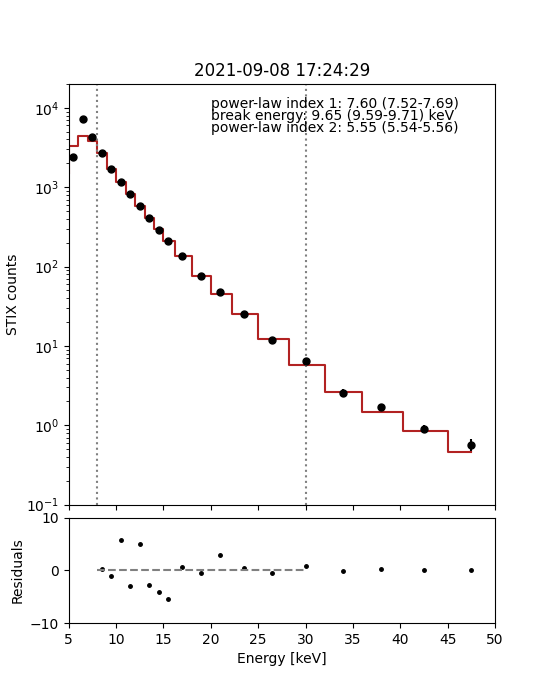

In [97]:
#do in matplotlib so it shows up in github
fig,axs=plt.subplots(2,1,figsize=(5.5,7),gridspec_kw=dict( height_ratios=[4,1],hspace=0.05))

axs[0].errorbar(x1,y1,yerr=y1err,ms=5,color='k',fmt='o')
axs[0].plot(xspec.Plot.x(),xspec.Plot.model(),color='firebrick',drawstyle='steps-mid')
axs[0].set_ylabel('STIX counts')
ylim=[0.1,2*10**4]
xlim=[5,50]
axs[0].set_ylim(ylim)
axs[0].set_yscale('log')
for aa in axs:
    aa.set_xlim(xlim)
    aa.label_outer()
    
axs[0].set_title(title)
    
fiter=[fitstart,fitend]
axs[0].plot([fiter[0],fiter[0]],[ylim[0],10**(np.log10(ylim[1]))],':',color='grey')
axs[0].plot([fiter[1],fiter[1]],[ylim[0],10**(np.log10(ylim[1]))],':',color='grey')

# Calculate and plot the residuals on the bottom plot
resid=(np.subtract(xspec.Plot.y(),xspec.Plot.model()))
axs[1].plot(xspec.Plot.x(),resid,'.',ms=5,color='k')
axs[1].set_ylim([-10,10])
axs[1].set_xlabel('Energy [keV]')
axs[1].plot(fiter,[0,0],'--',color='grey')
axs[1].set_ylabel('Residuals')
axs[0].text(20,10000,fittext[:fittext.find('<br>')])
axs[0].text(20,7000,fittext[fittext.find('<br>')+4:fittext.rfind('<br>')])
axs[0].text(20,5000,fittext[fittext.rfind('<br>')+4:])
plt.show()

## Beyond the demo

Here's a few things to try with the STIX data:
- fit spectra for more than one time bin
- try spectral rebinning ([rebin command](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node29.html)) to account for low counts at high energies
- try out the different models
- create Python/C versions of your favorite Ospex model 
- try out the different plot options - several are very useful, such as 'residuals' or 'ufspec'
- learn about the different statistics and fitting methods, see where they might make a difference
- try combining models - [this example](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node38.html) might be helpful